In [1]:
import xarray as xr

In [2]:
import ecco_v4_py as ecco

In [3]:
# ds = xr.open_zarr('ssh_sample.zarr')
ds = xr.open_dataset('/efs_ecco/wjiang/data_folder/ssh_climatology.nc')

In [4]:
grid = xr.open_dataset('/efs_ecco/wjiang/data_folder/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
from emu_mask import *

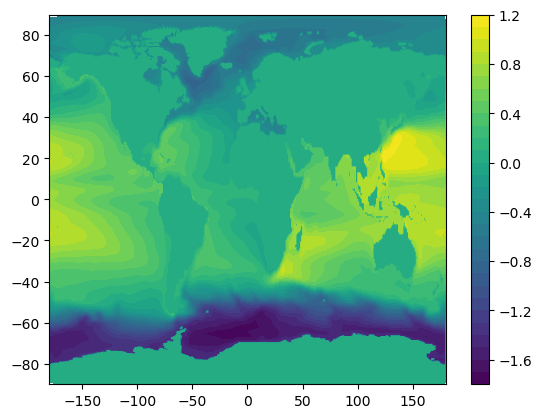

In [8]:
xx = np.array(ds.XC).ravel()
yy = np.array(ds.YC).ravel()
ssh = np.nan_to_num(np.array(ds.SSH).ravel())

plt.tricontourf(xx,yy,ssh,levels = 30)
plt.colorbar()

In [9]:
x_mask = np.logical_and(ds.XC>-75,ds.XC<-15)
y_mask = np.logical_and(ds.YC>45,ds.YC<70)
z_mask = grid.Z>-200
s_mask = ds.SSH<-0.5
naive_mask = np.logical_and(s_mask,np.logical_and(np.logical_and(x_mask,y_mask),z_mask)).transpose('k','tile','j','i')

In [10]:
weighted_mask = naive_mask*grid.hFacC*grid.drF*grid.rA

# Now we create the mask

In [11]:
weighted_mask = array2mask(weighted_mask)

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array dtype float32


In [22]:
bask = array2mask(naive_mask,form='>f8')

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array dtype bool


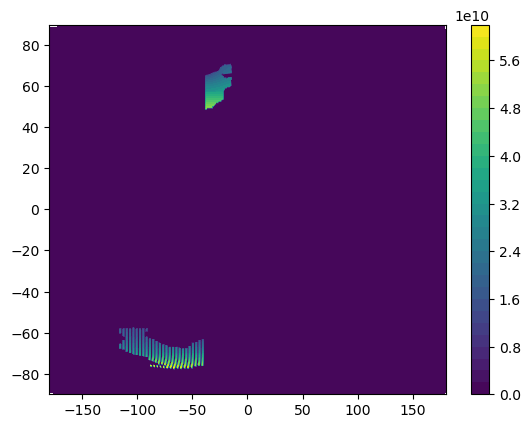

In [23]:
plt.tricontourf(xx,yy,weighted_mask.reshape(50,-1)[0].ravel(),levels = 30)
plt.colorbar()

In [24]:
weighted_mask.ravel().tofile('/efs_ecco/wjiang/masks/mask.crudespg')

In [25]:
bask.ravel().tofile('/efs_ecco/wjiang/masks/mask.boolspg')

In [21]:
bask4 = array2mask(naive_mask)
bask4.ravel().tofile('/efs_ecco/wjiang/masks/mask.boolspg4')

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array dtype bool


# We load the mask and see if it  works

In [28]:
hi = np.fromfile('/efs_ecco/wjiang/masks/mask.boolspg',dtype = '>f8')

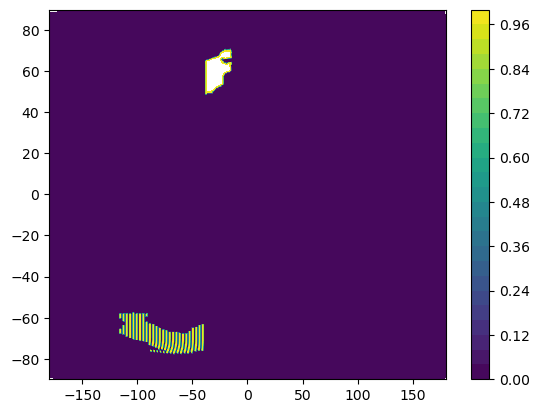

In [29]:
plt.tricontourf(xx,yy,hi.reshape(50,13,90,90)[0].ravel(),levels = 30)
plt.colorbar()

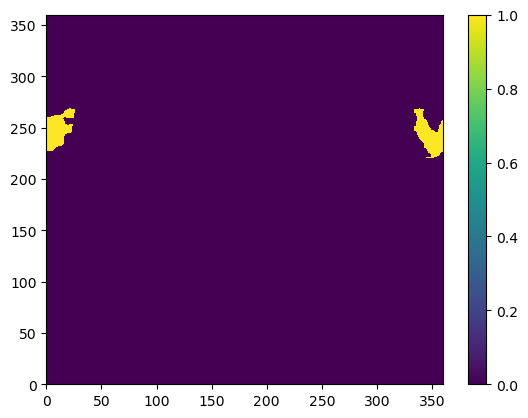

In [30]:
quickplotmask(hi)
plt.colorbar()